# Data Analysis on Breast Cancer Incidence in Different Regions of Sweden between 2020 and 2022
#### Megha Dharmesh

# Contents
1. [Introduction](#1.-Introduction)
2. [Method](#2.-Method)
    - 2.1. [Raw Data](#2.1.-Raw-Data)
    - 2.2. [Packages used](#2.2.-Packages-Used)
    - 2.3. [Data Transformation and Storage](#2.3.-Data-Transformation-and-Storage)
    - 2.4. [Accessing Stored Data from sqlite Database](#2.4.-Accessing-Stored-Data-from-sqlite-Database)
3. [Summary Statistics of the Data](#3.-Summary-Statistics-of-the-Data)
4. [Data Visualisation and Interpretation](#4.-Data-Visualisation-and-Interpretation)
5. [Conclusion](#5.-Conclusion)

## 1. Introduction
The National Board of Health and Welfare's statistical database provides national statistics on different health related data in Sweden. This report aims to analyse and present the breast cancer occurance trends in women in all the 20 regions of Sweden between the years 2020 and 2022. Breast cancer statistics was obtained for this report from https://sdb.socialstyrelsen.se/if_can/val_eng.aspx using filters that helped narrow-down the data that was required for this analysis.  

### Python 

Python plays a crucial role in building data infrastructures and performing various tasks related to data structuring, data flows/pipelines, exploratory data analysis (EDA), and statistical analysis. Some of the key roles that Python plays are as follows:

#### Data Structuring:
Python consists of libraries such as Pandas and NumPy which are widely used for data structuring and manipulation as, for example, Pandas provides data structures such as DataFrames and Series which are important to handle and organise structured data and NumPy is helpful for numerical data structuring.

#### Data Flows/Pipelines:
Python is often used to build ETL(Extract,Transform,Load) processes for extracting data from various sources, transforming it, and loading it into a target system

#### Exploratory Data Analysis (EDA):

1. **Jupyter Notebooks:**
   - Jupyter Notebooks, often used with Python, provide an interactive environment for EDA.
   - They allow for combining code, visualizations, and narrative, making it easy to explore and understand the data.

2. **Matplotlib and Seaborn:**
   - These libraries are used for creating static and interactive visualizations that can be 2D, 3D or animated, during the EDA process.

#### Statistical Analysis:

1. **SciPy and Statsmodels:**
   - SciPy provides statistical functions and tests for hypothesis testing, regression, and more.
   - Statsmodels is a library specifically designed for estimating and testing statistical models.

2. **Scikit-learn:**
   - Scikit-learn is a powerful machine learning library that includes tools for statistical modeling, including classification, regression, clustering, and dimensionality reduction.



In summary, Python is a versatile language that is widely used in every stage of the data lifecycle, from data structuring and ETL processes to exploratory data analysis, statistical analysis, and machine learning. Its rich ecosystem of libraries and tools makes it a preferred language for data professionals and analysts.

## 2. Method

The data was downloaded from the breast cancer statistics database of Socialstyrelsen after filtering for the data to have records for number of new cancer cases per 100,000 persons in all regions, amongst women of all age groups, for tumor diagnosis only in the breast,for the years 2020, 2021 and 2022. 

#### 2.1. Raw Data

The data was downloaded in an excel format and transformed with a csv file format compatible for upload and transformation in Jupyter lab. The data contained records for all 21 regions of Sweden and 4 columns consisting of the region name and values  for the years 2020, 2021 and 2022.

#### 2.2. Packages Used

In [91]:
#Importing packages and libraries
import pandas as pd #data manipulation and analysis, providing data structures like DataFrames.
import matplotlib.pyplot as plt #A plotting library for creating static, interactive, and animated visualizations in Python.
import sqlite3 #A Python interface for SQLite, a lightweight, embedded database engine often used for local storage.
import seaborn as sns #Built on Matplotlib; visualizations with a high-level interface and improved aesthetics for statistical graphics.


#### 2.3. Data Transformation and Storage

The data was cleaned and an average column was added which had an average of the values for all years for each region. The transformed dataframe was stored in an sqlite database. This process was recorded in a .py file as a python pipeline is helpful for easy access and collaboration so as to make the data analysis process uniform.

#### 2.4. Accessing Stored Data from sqlite Database

In [92]:
conn = sqlite3.connect("BreastCancer_Database.db")
df = pd.read_sql_query("SELECT * FROM BreastCancerAnalysis", conn)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Region   21 non-null     object 
 1   2020     21 non-null     float64
 2   2021     21 non-null     float64
 3   2022     21 non-null     float64
 4   average  21 non-null     float64
dtypes: float64(4), object(1)
memory usage: 972.0+ bytes


## 3. Summary Statistics of the Data

Summary statistics was obtained using the pandas .describe() function to get a good understanding of the data.

In [89]:
summary_stats = df.describe().round(2)
summary_stats

,2020,2021,2022,average
count,21.00,21.00,21.00,21.00
mean,202.23,221.71,215.63,213.19
std,31.72,25.57,34.31,25.75
min,163.01,182.89,161.41,174.68
25%,176.55,202.20,188.11,194.82
50%,197.34,213.47,208.12,206.73
75%,216.64,239.56,235.11,229.24
max,269.40,274.77,281.55,270.86


## 4. Data Visualisation and Interpretation

To visualise and understand the spread of data in terms of the average occurance of breast cancer in the regions, a bar chart was plotted. 

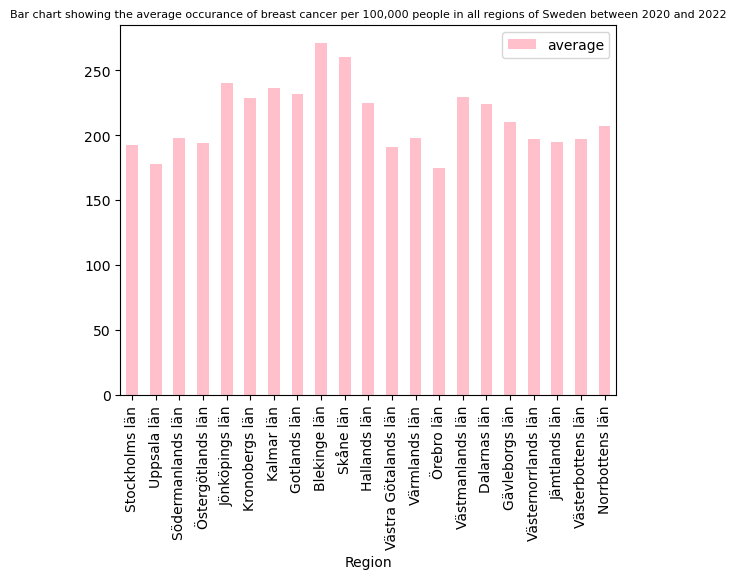

In [103]:
#Bar Chart showing the spread of average values amongst the regions 
avgbarplot = df.plot('Region','average',kind="bar",color='pink')
plt.title("Bar chart showing the average occurance of breast cancer per 100,000 people in all regions of Sweden between 2020 and 2022", size=8)
plt.show()

From the bar chart, it can be interpreted that Blekinge and Skåne regions are regions with some of the highest average values. To confirm this, let us perform a ranked bar chart which would also help pick out the third highest region that is not easy to find in the above chart. This leads us to the question:

#### What are some of the regions with the highest average incidence of breast cancer?

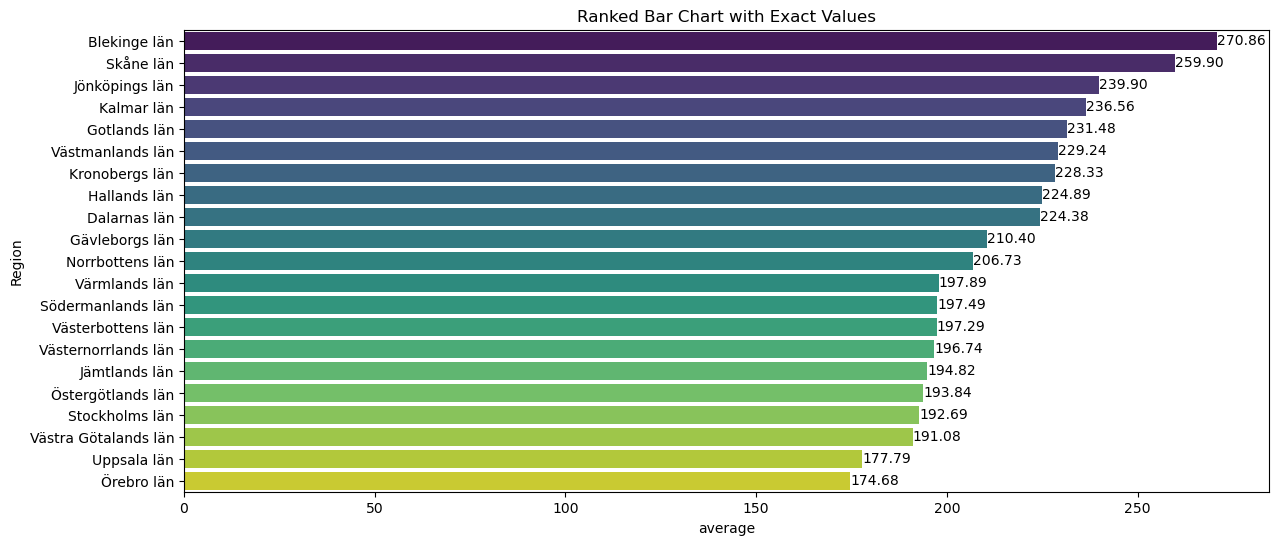

In [93]:
ranked_df = df.sort_values(by='average', ascending=False)

# Creating a ranked bar chart with exact values inside each bar
plt.figure(figsize=(14, 6))
bar_plot = sns.barplot(x='average', y='Region', data=ranked_df, palette='viridis')

# Displaying exact values inside each bar
for index, value in enumerate(ranked_df['average']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center")

plt.title('Ranked Bar Chart with Exact Values')
plt.show()


The ranked bar chart confirms that the 3 regions with the highest average values are Blekinge, Skåne and Jönköping. It also helps us find where all the regions stand in average for further analysis.

#### What have the incidences looked like for the top 5 regions with the highest average values?

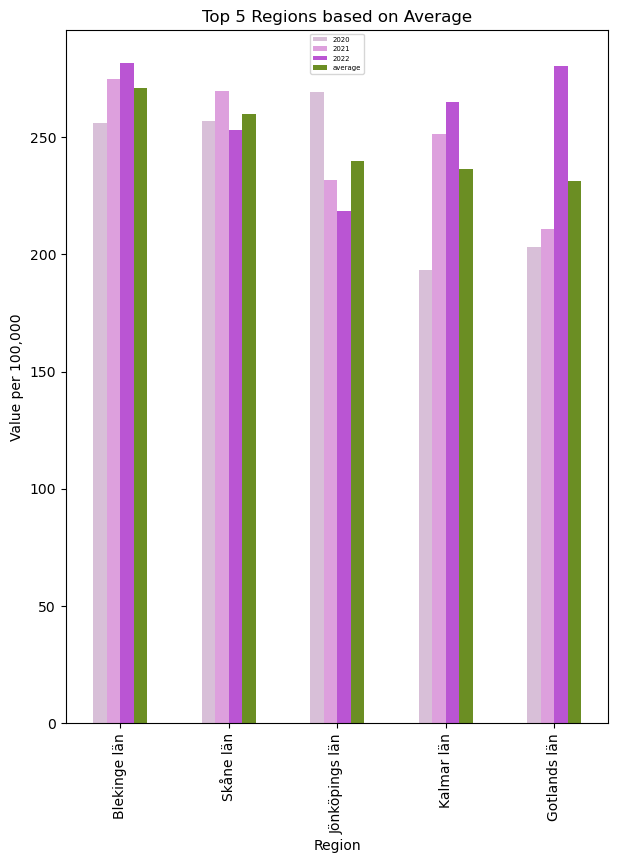

In [104]:
#Plotting a bar chart showing the top 5 regions with highest average values
avgplotdesc_5 = df.sort_values(by='average', ascending=False).head(5)

bar_colors = ['thistle', 'plum', 'mediumorchid','olivedrab']

a5 = avgplotdesc_5.plot(kind="bar", color= bar_colors)

# Setting the title and labels for the axes
plt.title('Top 5 Regions based on Average')
plt.xlabel('Region')
plt.ylabel("Value per 100,000")
a5.set_xticklabels(avgplotdesc_5['Region'])

a5.legend(loc='upper center',prop={'size': 5})

plt.gcf().set_size_inches(7, 9)

#### Are there any regions that saw drastic increase in incidences as the years progressed?

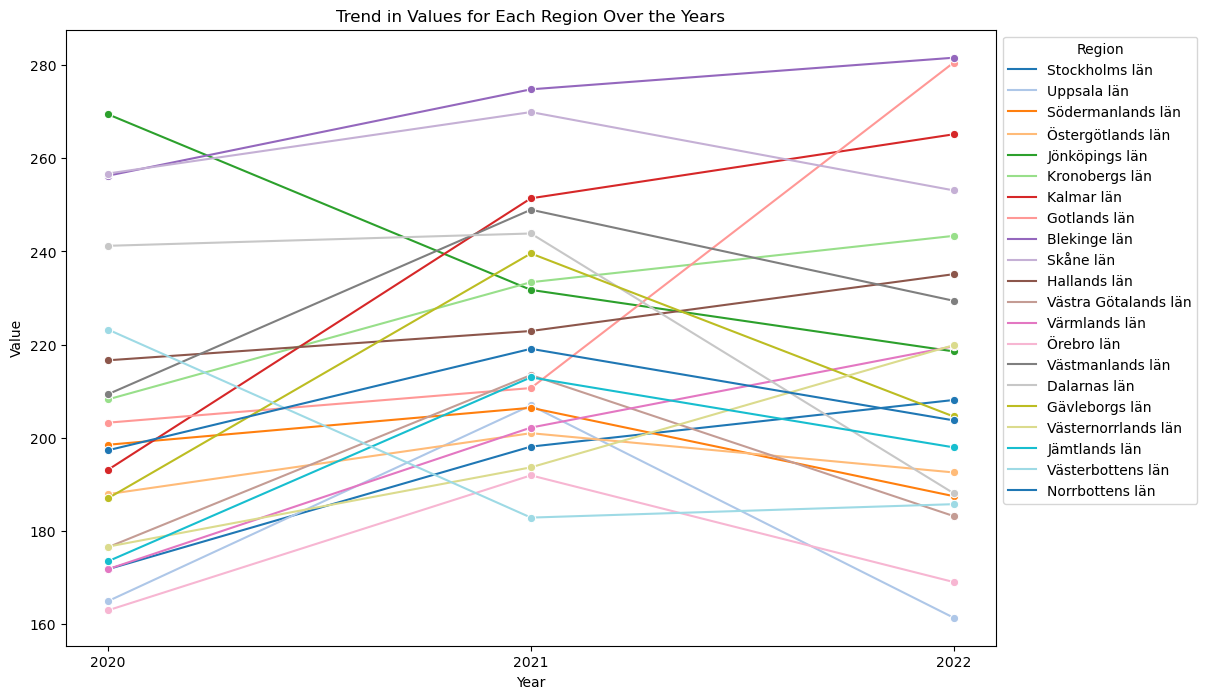

In [98]:
#To exclude average and melt to long format for better plotting
melted_df_filtered = melted_df[melted_df['Year'] != 'average']

#Creating a line chart to show the trend over the years for each region
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Value', hue='Region', data=melted_df_filtered, marker='o', palette='tab20')
plt.title('Trend in Values for Each Region Over the Years')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(title='Region', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


From the line graph, it can be seen that Gotland saw a significant increase in incidences in 2022 compared to 2021. This leads us to the next question:

#### Did the regions with a drastic increase make it to the top 5 regions to have average highest incidences?

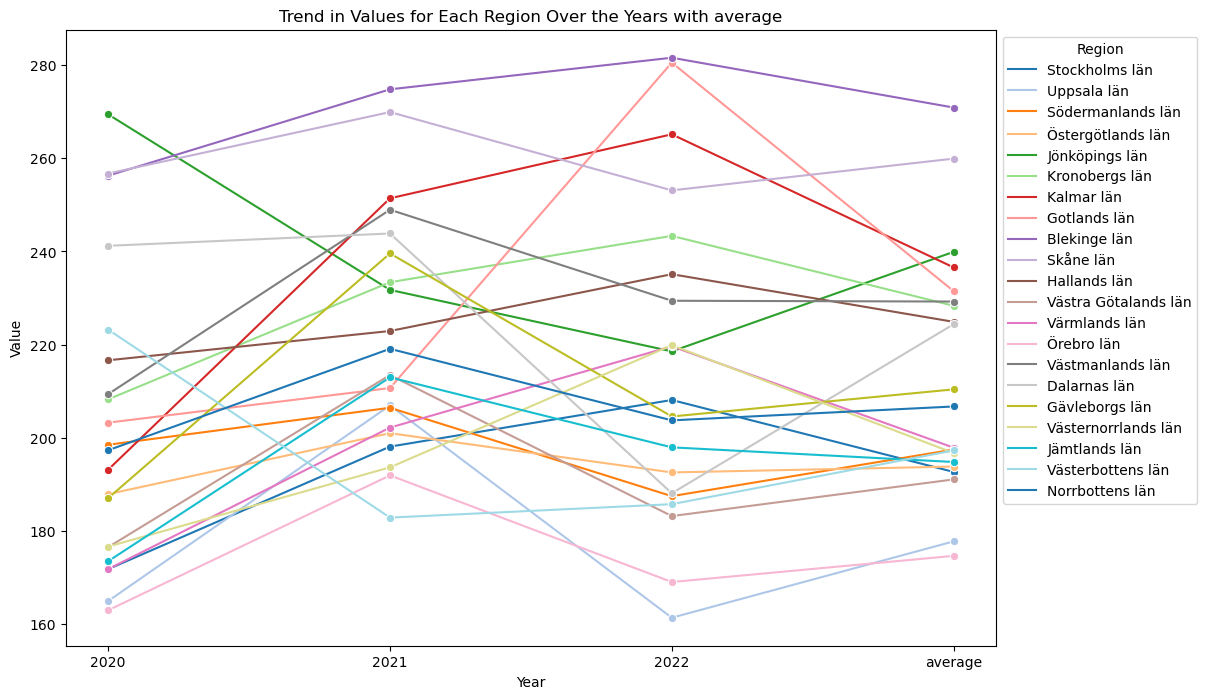

In [102]:
#Melting df to long format for better plotting
melted_df = df.melt(id_vars='Region', var_name='Year', value_name='Value')

# Creating a line chart to show the trend over the years for each region
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Value', hue='Region', data=melted_df, marker='o', palette='tab20')
plt.title('Trend in Values for Each Region Over the Years with average')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(title='Region', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


From the graph, it can be seen that Gotland ranked 5th highest in average breast cancer incidence.

## 5. Conclusion

Good visualisations help us better understand how the data is and how significant aspects are in the data. They help us answer questions and find points of interest. Based on the above, there have been several observations made, questions ansered and future analyses such as correlation and trend analysis can be performed on the breast cancer incidence data. 